<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/CNN_Cifar_10dataset_class_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries


In [ ]:
# import keras and tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Step 2: Load and Prepare the CIFAR-10 Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


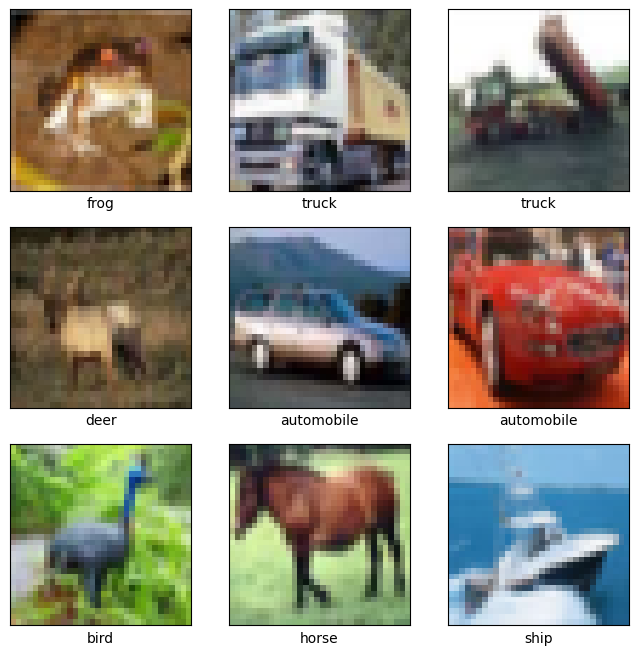

In [ ]:
# Loadind the CIFAR-10 Dataset from keras having a total of60000 images comprising of10 classes
# CIFAR 10 Dataset Structure
# Total images: 60,000
# Training images: 50,000
# Test images: 10,000
# Image size: 32 × 32 pixels (RGB color)
# Number of classes: 10


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0
# Cifar-10 classify 10 classes only
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display some sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Step 3: Build the CNN Model


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu')
])

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Compile and Train the Model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3457 - loss: 1.7766 - val_accuracy: 0.5300 - val_loss: 1.3159
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5566 - loss: 1.2435 - val_accuracy: 0.5930 - val_loss: 1.1434
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6256 - loss: 1.0648 - val_accuracy: 0.6491 - val_loss: 0.9965
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6624 - loss: 0.9625 - val_accuracy: 0.6667 - val_loss: 0.9850
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6896 - loss: 0.8813 - val_accuracy: 0.6876 - val_loss: 0.9152
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7174 - loss: 0.8043 - val_accuracy: 0.6894 - val_loss: 0.8960
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7384 - loss: 0.7524 - val_accuracy: 0.7001 - val_loss: 0.8783
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7525 -

Step 5: Evaluate Model Performance


313/313 - 4s - 14ms/step - accuracy: 0.7058 - loss: 0.8839

✅ Test accuracy: 0.71


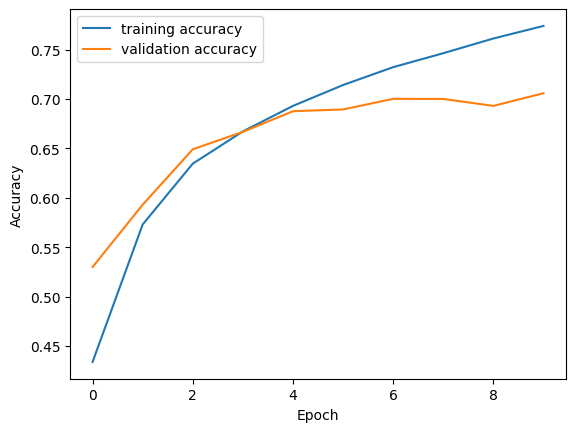

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n✅ Test accuracy: {test_acc:.2f}')

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Softmax
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def predict_new_image(model, image_path):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).resize((32, 32))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        prob_model = Sequential([model, Softmax()])
        prediction = prob_model.predict(img_array)
        predicted_class = np.argmax(prediction[0])
        confidence = np.max(prediction[0])

        # Display results
        print("\n🖼️ Image Path:", image_path)
        print("🔍 Predicted Class:", class_names[predicted_class])
        print(f"✅ Confidence: {confidence*100:.2f}%")

        plt.imshow(img)
        plt.title(f"Prediction: {class_names[predicted_class]} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("❌ Error:", e)

# Example usage:
# predict_new_image(model, "sample_images/cat.jpg")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 32)

In [ ]:
predict_new_image(model, "/content/download cmputer vision3.jpeg")